# WeRateDogs Twitter Data Wrangling

This project is to gather the data from [WeRateDogs (@dog_rates)](https://twitter.com/dog_rates), then assess and clean the data for further exploratory data analysis, and also training a recurrent neural network to identify the species of dogs.

The project focuses on below targets:
1. Keep the original ranks from WeRateDogs only, not the ones from retweet 
2. At least 8 quality issues and 2 tidiness issues
3. Including merge data table to achieve tidiness target
4. Be noticed that numerator sometimes is larger than denominator in this dataset, and that is the way WeRateDogs runs

The process of this project is as below:
1. Data wrangling, including cleaning, assessing and cleaning in programmatic ways
2. Store, analyze and visualize the processed data
3. Summary the first two steps in a report

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering

There are three files to be gathered:
1. Download twitter data of WeRateDogs from [GitHub repo](https://github.com/udacity/new-dand-advanced-china/tree/master/数据清洗/WeRateDogs项目)
2. Download programmatically for the image recognition result of dog species, in above repo
3. Gather retweet_count and favorite_count via `Tweepy` API, and combine them into a JSON format txt file, each line representing a single record, at least including `tweet ID`, `retweet_count` and `favorite_count` information 

After gathering, import all into separated `pandas.DataFrame` 

In [2]:
##### 1. Import existed dataset, including tweet ID #####
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [3]:
##### 2. Programmatically download image recoginition result ######
image_predictions = pd.read_csv('https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv',
                               sep='\t')
image_predictions.to_csv('image-predictions.tsv')
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [4]:
##### 3. Info from Twitter API via tweepy #####
### Create tweepy instance for Twitter API ###
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_token_secret = ''

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
### Looping to download all info and store in a list instance ###
# tweet_json = []
# tweet_error = {}
# for tweet_id in twitter_archive_enhanced.tweet_id:
#     try:
#         tweet = api.get_status(tweet_id, tweet_mode='extended')
#         tweet_json.append(tweet._json)
#     except Exception as e:
#         tweet_error[tweet_id] = e

In [6]:
### Re-download the error part ###
# tweet_error_2nd = {}
# for tweet_id in tweet_error.keys():
#     try:
#         tweet = api.get_status(tweet_id, tweet_mode='extended')
#         tweet_json.append(tweet._json)
#     except Exception as e:
#         tweet_error_2nd[tweet_id] = e

In [7]:
# tweet_error_2nd

In [8]:
### From above, there are 11 tweet_id are unable to find corresponding info ###
### Re-download the last one ###
# tweet = api.get_status('704761120771465216', tweet_mode='extended')
# tweet_json.append(tweet._json)

In [9]:
### Store result in txt file ###
# with open('tweet_json_YY.txt', 'w') as output:  
#     for i in range(len(tweet_json)):
#         json.dump(tweet_json[i], output)

In [10]:
### Import tweet_json.txt to pandas.DataFrame ###
# Only include tweet ID, retweet_count and favorite_count #
json_str = []
with open('tweet_json.txt', encoding='utf-8') as json_file:
    for i in range(2352):   # there are 2352 rows in txt file got from visual inspection
        tweet = json_file.readline()
        json_str.append(tweet)

In [11]:
# Transform string read from txt to dic, and store in list to create DataFrame #
json_list = []
for i in range(len(json_str)):
    json_list.append(json.loads(json_str[i]))

tweet_json = pd.DataFrame(json_list)[['id', 'retweet_count', 'favorite_count']]

In [12]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Summary of Data Collection

Corresponding to three targets,
1. Existed file was loaded via `pandas.read_csv` from local path, storing as `twitter_archive_enhanced` dataframe
2. Image recognition result was downloaded via `pandas.read_csv` from url, storing as `image_predictions` dataframe
3. Tweet info downloaded via tweepy was stored in `tweet_json_YY.txt`, to be distinguishable from the provided `tweet_json.txt` . However, to be eaiser for project reivew, `tweet_json.txt` was still used to generate `tweet_json` dataframe for the rest of project.

## Data Assessing

Accomplish at least 8 quality issues and 2 tidiness issues.

In [13]:
twitter_archive_enhanced.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [14]:
##### Check the max number of items in expanded_urls #####
urls_split = twitter_archive_enhanced.expanded_urls.str.strip().str.split(',')

url_count = 1
missing_cell = []
for i in range(len(urls_split)):
    try:
        if len(urls_split[i])>url_count:
            url_count = len(urls_split[i])
    except Exception as e:
        missing_cell.append(i)
print ('Max number of items in a cell is ' + str(url_count))

Max number of items in a cell is 8


### Quality
#### Table `twitter_archive_enhanced` 
- we only consider the tweets with original rates and pictures, replies, retweets and tweets without pictures should be removed
- column `source` is recored as html element but the useful part is only the content *(Validity)*
- column `name` has 55 values equaling to 'a', and another words like 'an', 'actually' etc, but actually there is no dog names in text *(Validity)*
- column `rating_denominator` has cell not equaling to 10. Some are due to multiple dogs in the picture, and some are due to wrong extraction from text. *(Validity and Consistency)*
- columns `timestamp` have '+0000' after all time but meaningless
- columns `timestamp` should be datetime dtype
- all 'None' values should be set as missing values using NaN

#### Table `image_predictions` 
- columns `p1`, `p2`, `p3` have cells starting with either upper case or lower case letter *(Consistency)*

### Tidiness
- (`twitter_archive_enhanced`) column `expanded_urls` has some cells with twitter urls and external urls, or duplicated urls
- (`twitter_archive_enhanced`) columns `doggo`, `floofer`, `pupper` and `puppo` is actually one variable
- table `tweet_json` and `image_predictions` are parts of `twitter_archive_enhanced` 

## Data Cleaning

Accomplish at least 8 quality issues and 2 tidiness issues.

In [15]:
##### Copy original data to be cleaned ######
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_claen = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

There is no completeness issues, so start with tidiness issues.

### Tidiness

#### 1. (twitter_archive_enhanced) column `expanded_urls` has some cells with twitter urls and external urls, or duplicated urls

##### Define 1
1. Split urls by comma, remove duplicated urls
2. Filter out twitter urls and outter urls into separated columns

##### Code 1

In [16]:
### Split out urls as items in list ###
urls_split = twitter_archive_enhanced_clean.expanded_urls.str.strip().str.split(',')

### Remove duplicated urls ###
missing_cell = []
for i in range(len(urls_split)):
    try:
        urls_split[i] = list(set(urls_split[i]))
    except Exception as e:
        missing_cell.append(i)
        
##### Check the max number of items in expanded_urls after cleaning #####
url_count = 1
missing_cell = []
for i in range(len(urls_split)):
    try:
        if len(urls_split[i])>url_count:
            url_count = len(urls_split[i])
    except Exception as e:
        missing_cell.append(i)
print ('Max number of items in a cell is ' + str(url_count))

##### Split out twitter url and outter url #####
regex = re.compile(r'https://twitter.*')
twitter_urls = []
outter_urls = []

for i in range(len(urls_split)):
    
    if urls_split[i] != urls_split[i]:
        twitter_urls.append(np.nan)
        outter_urls.append(np.nan)
    
    elif list(filter(regex.match, urls_split[i])):
        t_url = list(filter(regex.match, urls_split[i]))
        twitter_urls.append(t_url[0])
        outter_urls.append(np.nan)
    else:
        twitter_urls.append(np.nan)
        outter_urls.append(urls_split[i][0])

### Generate new columns and append on original dataframe ###
clean_url_dict = {'twitter_urls': twitter_urls,
                  'outter_urls': outter_urls}
clean_urls = pd.DataFrame(clean_url_dict)

### Drop original column and merge new columns to twitter_archive_enhanced_clean ###
twitter_archive_enhanced_clean.drop('expanded_urls', axis=1, inplace=True)
twitter_archive_enhanced_clean = pd.concat([twitter_archive_enhanced_clean, clean_urls], axis=1)

Max number of items in a cell is 2


##### Test 1

In [17]:
twitter_archive_enhanced_clean.twitter_urls.head(5)

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
Name: twitter_urls, dtype: object

In [18]:
first_notnull = twitter_archive_enhanced_clean.outter_urls.first_valid_index()
twitter_archive_enhanced_clean.outter_urls.iloc[first_notnull-2:first_notnull+3]

308                              NaN
309                              NaN
310    https://vine.co/v/5W2Dg3XPX7a
311                              NaN
312                              NaN
Name: outter_urls, dtype: object

-----

#### 2. (twitter_archive_enhanced) columns doggo, floofer, pupper and puppo is actually one variable

##### Define 2

1. Combine four stage columns
2. Manual update cell with multiple stage info by understanding each tweet

##### Code 2

In [19]:
##### Combine four stage columns into one list #####
stage = twitter_archive_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']]

dogs_list = []
for i in range(len(twitter_archive_enhanced_clean)):
    dogs = list(set(stage.iloc[i].values))
    if len(dogs)>1:
        dogs.remove('None')
    dogs_list.append(dogs)

In [20]:
##### Manual handle cell with double dogs #####
### Return a index list of cell with double dogs ###
multi_dogs = []
length = 1
for i in range(len(dogs_list)):
    if len(dogs_list[i])>1:
        multi_dogs.append(i)
        if len(dogs_list[i])>length:
            length = len(dogs_list[i])
print ('Maximum length of single cell: '+str(length))

Maximum length of single cell: 2


In [21]:
### Read tweets and understand their real meaning ###
dogs_list[multi_dogs[0]] = ['puppo']  # 191
dogs_list[multi_dogs[1]] = ['floofer']  # 200
dogs_list[multi_dogs[2]] = ['pupper']  # 460
dogs_list[multi_dogs[3]] = dogs_list[multi_dogs[3]]  # two dogs in pic 531
dogs_list[multi_dogs[4]] = dogs_list[multi_dogs[4]]  # two dogs in pic 565
dogs_list[multi_dogs[5]] = ['pupper']  # 575
dogs_list[multi_dogs[6]] = ['doggo']  # 705
dogs_list[multi_dogs[7]] = dogs_list[multi_dogs[7]]  # two dogs in pic 733
dogs_list[multi_dogs[8]] = dogs_list[multi_dogs[8]]  # two dogs in pic 778 RT
dogs_list[multi_dogs[9]] = dogs_list[multi_dogs[9]]  # two dogs in pic 822 RT
dogs_list[multi_dogs[10]] = dogs_list[multi_dogs[10]]  # two dogs in pic 889
dogs_list[multi_dogs[11]] = ['None']  # 956
dogs_list[multi_dogs[12]] = dogs_list[multi_dogs[12]]  # two dogs in pic 1063
dogs_list[multi_dogs[13]] = dogs_list[multi_dogs[13]]  # two dogs in pic 1113

In [22]:
##### Create new columns and update original DataFrame ######
dogs_dict = {'dog_stage': list(",".join(map(str,i)) for i in dogs_list)}
dog_stage = pd.DataFrame(dogs_dict)
twitter_archive_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
twitter_archive_enhanced_clean = pd.concat([twitter_archive_enhanced_clean, dog_stage], axis=1)

##### Test 2

In [23]:
twitter_archive_enhanced_clean.dog_stage.iloc[10:16]

10     None
11     None
12    puppo
13     None
14    puppo
15     None
Name: dog_stage, dtype: object

-----

#### 3. table `tweet_json` and `image_predictions` are parts of `twitter_archive_enhanced`

##### Define 3

1. Join `retweet_count` and `favorite_count` from `tweet_json` to `twitter_archive_enhanced`
2. Join dog species with highest probability of prediciton from `image_predicitons` to `twitter_archive_enhanced`

##### Code 3

In [24]:
##### Join with tweet_json #####
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean,
                                          tweet_json,
                                          left_on='tweet_id', right_on='id',
                                          how='left')
twitter_archive_enhanced_clean.drop(['id'], axis=1, inplace=True)

In [25]:
##### Join with image_prediction #####
### Select out highest prob dog prediction ###
tweet_id = []
species_list = []
species_prob_list = []

for i in range(len(image_predictions)):
    
    tweet_id.append(image_predictions.tweet_id[i])
    
    if image_predictions.p1_dog[i]==True:
        species_list.append(image_predictions.p1[i])
        species_prob_list.append(image_predictions.p1_conf[i])
    
    elif image_predictions.p2_dog[i]==True:
        species_list.append(image_predictions.p2[i])
        species_prob_list.append(image_predictions.p2_conf[i])
    
    elif image_predictions.p3_dog[i]==True:
        species_list.append(image_predictions.p3[i])
        species_prob_list.append(image_predictions.p3_conf[i])
    
    else:
        species_list.append(np.nan)
        species_prob_list.append(np.nan)
        
### Create DataFrame and join ###
image_pred_dict = {'tweet_id': tweet_id,
                   'species': species_list,
                   'species_prob': species_prob_list}
image_pred = pd.DataFrame(image_pred_dict)
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean,
                                          image_pred,
                                          left_on='tweet_id', right_on='tweet_id',
                                          how='left')

##### Test 3

In [26]:
twitter_archive_enhanced_clean.species.head(5)

0                   NaN
1             Chihuahua
2             Chihuahua
3    Labrador_retriever
4                basset
Name: species, dtype: object

In [27]:
twitter_archive_enhanced_clean.species_prob.head(5)

0         NaN
1    0.323581
2    0.716012
3    0.168086
4    0.555712
Name: species_prob, dtype: float64

-----
### Quality on Table `twitter_archive_enhanced`

#### 1. Only consider the tweets with original rates and pictures

Replies, retweets and tweets without pictures should be removed.

##### Define 1
1. remove rows with not null in `in_reply_to_status_id` 
2. remove rows with not null in `retweeted_status_id`
3. remove rows with null in `twitter_urls` and `outter_urls` (`expanded_urls` in original table)
4. remove `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns

##### Code 1

In [28]:
##### Remove reply tweets #####
mask_reply = twitter_archive_enhanced_clean.in_reply_to_status_id.notnull()
twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean[mask_reply].index, axis=0, inplace=True)

In [29]:
##### Remove retweet #####
mask_retweet = twitter_archive_enhanced_clean.retweeted_status_id.notnull()
twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean[mask_retweet].index, axis=0, inplace=True)

In [30]:
##### Remove tweets without image #####
mask_image = (twitter_archive_enhanced_clean.twitter_urls.isnull()) & (twitter_archive_enhanced_clean.outter_urls.isnull())
twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean[mask_image].index, axis=0, inplace=True)

In [31]:
##### Remove reply and retweet related columns #####
twitter_archive_enhanced_clean.drop(['in_reply_to_status_id',
                                     'in_reply_to_user_id',
                                     'retweeted_status_id',
                                     'retweeted_status_user_id',
                                     'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test 1

In [32]:
##### Check remaining columns #####
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'outter_urls', 'twitter_urls',
       'dog_stage', 'retweet_count', 'favorite_count', 'species',
       'species_prob'],
      dtype='object')

In [33]:
##### Check whether there is tweet without image or video #####
((twitter_archive_enhanced_clean.twitter_urls.isnull()) & (twitter_archive_enhanced_clean.outter_urls.isnull())).sum()

0

-----

#### 2. Column `source` is recored as html element but the useful part is only the content *(Validity)*

##### Define 2
Use regex to filter out the content from html element, and replace the original value in cell

##### Code 2

In [34]:
##### Filter with regex #####
regex = re.compile(r'[TV][^\<]*')
source_list = []

for i in twitter_archive_enhanced_clean.index:
    matches = regex.findall(twitter_archive_enhanced_clean.source[i])
    source_list.append(matches[0])

In [35]:
##### Create DataFrame and join #####
source_dict = {'source': source_list}
source_clean = pd.DataFrame(source_dict, index=twitter_archive_enhanced_clean.index)
twitter_archive_enhanced_clean.drop('source', axis=1, inplace=True)
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean,
                                          source_clean,
                                          left_index=True, right_index=True,
                                          how='left')

##### Test 2

In [36]:
twitter_archive_enhanced_clean.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

-----

#### 3. Column `name` has values which are not names *(Validity)*

Column `name` has 55 values equaling to 'a', and another words like 'an', 'actually' etc, but actually there is no dog names in text.

##### Define 3
1. Detect value starting with lowercase and None using regex
2. Replace with `np.nan`

##### Code 3

In [37]:
##### Detect and replace non-dog names with regex #####
twitter_archive_enhanced_clean.name.replace(r'\b[a-z][a-z]*|None', np.nan, regex=True, inplace=True)

##### Test 3

In [38]:
twitter_archive_enhanced_clean.name.value_counts().head(5)

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
Name: name, dtype: int64

-----

#### 4. Column `rating_denominator` has cell not equaling to 10

Some are due to multiple dogs in the picture, and some are due to wrong extraction from text. (Validity and Consistency)

##### Define 4
1. Manually handle 4 rows with denominator not a multiple of 10
2. Create a column indicating the number of dogs in tweet image, by dividing denominator by 10
3. Create a column indicating the average rating of dogs in each tweet, by dividing numerator by the number of dogs
4. Remove numerator and denominator columns

##### Code 4

In [39]:
##### Manually handle 4 rows with denominator equalling 2,7,11 #####
handle_ind = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating_denominator%10 != 0].index
### 1st row ###
twitter_archive_enhanced_clean.drop(handle_ind[0], inplace=True)  # no rating, remove row
### 2nd row ###
twitter_archive_enhanced_clean.rating_numerator.at[handle_ind[1]] = 14
twitter_archive_enhanced_clean.rating_denominator.at[handle_ind[1]] = 10
### 3rd row ###
twitter_archive_enhanced_clean.rating_numerator.at[handle_ind[2]] = 10
twitter_archive_enhanced_clean.rating_denominator.at[handle_ind[2]] = 10
# ### 4th row ###
twitter_archive_enhanced_clean.rating_numerator.at[handle_ind[3]] = 9
twitter_archive_enhanced_clean.rating_denominator.at[handle_ind[3]] = 10

In [40]:
##### Create column for the number of dogs #####
twitter_archive_enhanced_clean['num_of_dog'] = twitter_archive_enhanced_clean.rating_denominator/10
twitter_archive_enhanced_clean.num_of_dog = twitter_archive_enhanced_clean.num_of_dog.astype('int')

In [41]:
##### Create column for average rating of dogs #####
twitter_archive_enhanced_clean['avg_rating'] = (twitter_archive_enhanced_clean.rating_numerator
                                                / twitter_archive_enhanced_clean.num_of_dog)
twitter_archive_enhanced_clean.avg_rating = twitter_archive_enhanced_clean.avg_rating.astype('int')

In [42]:
##### Remove numerator and denominator columns #####
twitter_archive_enhanced_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

##### Test 4

In [43]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'name', 'outter_urls', 'twitter_urls',
       'dog_stage', 'retweet_count', 'favorite_count', 'species',
       'species_prob', 'source', 'num_of_dog', 'avg_rating'],
      dtype='object')

In [44]:
twitter_archive_enhanced_clean.num_of_dog.value_counts().head(5)

1     2080
5        3
8        2
17       1
15       1
Name: num_of_dog, dtype: int64

In [45]:
twitter_archive_enhanced_clean.avg_rating.value_counts().head(5)

12    489
10    437
11    418
13    287
9     154
Name: avg_rating, dtype: int64

-----

#### 5. Columns `timestamp` have '+0000' after all time

Columns `timestamp` have '+0000' after all time but meaningless.

##### Define 5
1. Remove '+0000'

##### Code 5

In [46]:
##### Remove '+0000' by replacing it with nothing #####
twitter_archive_enhanced_clean.timestamp.replace(r'\s\+0000', '', regex=True, inplace=True)

##### Test 5

In [47]:
twitter_archive_enhanced_clean.timestamp.head(5)

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

-----

#### 6. Columns `timestamp` should be datetime dtype

##### Define 6
1. Convert `timestamp` to datetime dtype

##### Code 6

In [48]:
twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp,
                                                          errors='coerce')

##### Test 6

In [49]:
twitter_archive_enhanced_clean.timestamp.dtype

dtype('<M8[ns]')

In [50]:
twitter_archive_enhanced_clean.timestamp.isnull().sum()

0

-----

#### 7. All 'None' values should be set as missing values using NaN

##### Define 7
1. replace 'None' values with np.nan

##### Code 7

In [51]:
twitter_archive_enhanced_clean.replace('None', np.nan, inplace=True)

##### Test 7

In [52]:
(twitter_archive_enhanced_clean=='None').sum()

tweet_id          0
timestamp         0
text              0
name              0
outter_urls       0
twitter_urls      0
dog_stage         0
retweet_count     0
favorite_count    0
species           0
species_prob      0
source            0
num_of_dog        0
avg_rating        0
dtype: int64

-----
### Quality on Table `image_predictions`

#### 8. Columns p1, p2, p3 have cells starting with either upper case or lower case letter (Consistency)

Since table `image_predictions` was joint with table `twitter_archive_enhanced`, we only consider update column `species`.

##### Define 8

Uppercase the first letter of each value.

##### Code 8

In [53]:
twitter_archive_enhanced_clean.species = twitter_archive_enhanced_clean.species.str.capitalize()

##### Test 8

In [54]:
regex = re.compile(r'^[a-z]')
start_lower = []
error = []
for i in twitter_archive_enhanced_clean.species:
    try:
        matches = regex.findall(i)
        if len(matches) != 0:
            start_lower.append(i)
    except Exception as e:
        error.append(e)
print (start_lower)

[]


## Data Storage and Visualization

1. Store the processed data as `twitter_archive_master.csv`
2. Illustrate at least 3 intuitions from data analysis and 1 visualization

In [55]:
##### Store the processed master table #####
twitter_archive_enhanced_clean.to_csv('twitter_archive_master.csv')
twitter_archive_master = twitter_archive_enhanced_clean.copy()

In [56]:
date_timestamp = pd.DataFrame(twitter_archive_master.timestamp.apply(lambda x: x.strftime('%Y-%m')))

Text(0.5,1,'Count of Tweets by Date')

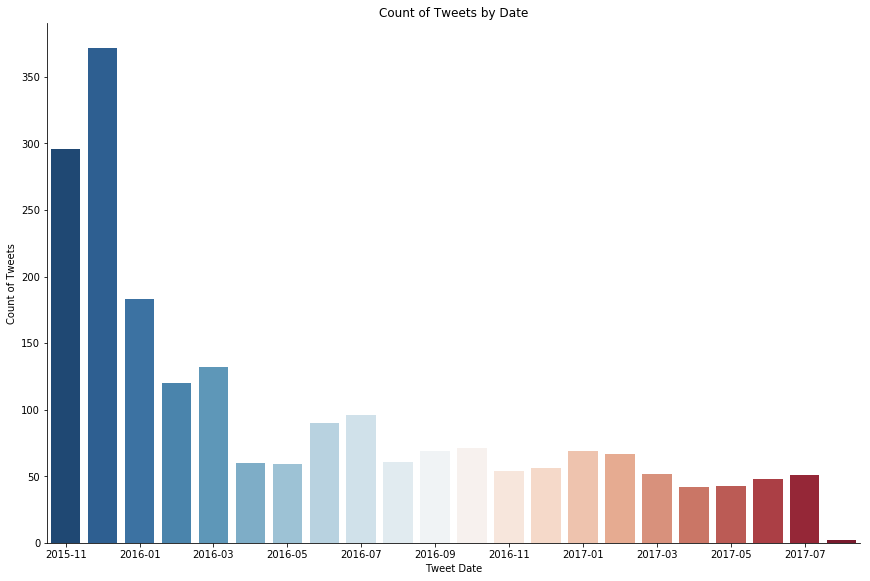

In [57]:
##### Visualization #####
### Distribution of the number of tweets by time ###
date = np.sort(twitter_archive_master.timestamp.apply(lambda x: x.strftime('%Y-%m')).unique())

g = sns.factorplot(x='timestamp', data=date_timestamp, kind="count",
                   palette="RdBu_r", size=8, aspect=1.5, order=date)
g.set_xticklabels(step=2)
g.set_xlabels(label='Tweet Date')
g.set_ylabels(label='Count of Tweets')
plt.title('Count of Tweets by Date')

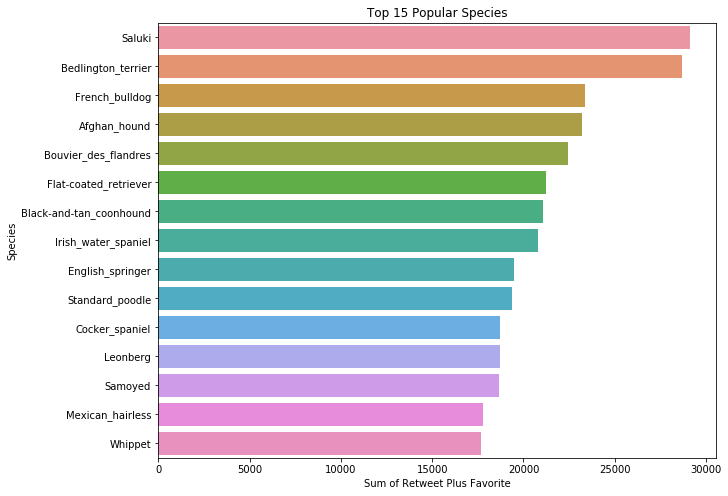

In [58]:
### Favorite and retweet average counts by species (top 15) ###
count_mean = (twitter_archive_master[['retweet_count', 'favorite_count', 'species']]
              .groupby(['species']).mean().sum(axis=1).astype('int'))
top_species = count_mean.nlargest(15)

f, ax = plt.subplots(1, 1, figsize=(10, 8))

g1 = sns.barplot(x=top_species, y=top_species.index, ax=ax)
ax.set_title('Top 15 Popular Species')
ax.set_xlabel('Sum of Retweet and Favorite')
ax.set_ylabel('Species')

plt.show()

In [59]:
### Device type (source) of tweeting by time ###


## Sumamry Report

1. 300-to-600-word report for internal assessment to complete project, about how the whole project was done, saved as `wrangle_report.pdf` 
2. ~250-word report for external demonstration like blog post, saved as `act_report.pdf` 